# Morocco Electricity Consumption Analysis

## Introduction
This project analyzes electricity consumption in Morocco, measured at **10-minute intervals** across **three zones**. The dataset also includes environmental factors such as **temperature, humidity, and wind speed**.


## Data Import and Initial Exploration

In [42]:
# Loading the Electricity consumption data

import pandas as pd

# Dataset contains electricity consumption in Morocco measured at 10 minute interval across 3 zones.
consumption = pd.read_csv('/Users/venkat/Downloads/Electricity Usage Analysis/Electricity+Consumption/powerconsumption.csv')

consumption.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [51]:
# Display first few rows

consumption.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627,0,6


## Data Cleaning and Preprocessing

Before analysis, we need to:
- Convert `Datetime` column to the correct **datetime format** and create categorical columns which is useful for analysis.

In [43]:
# Converting Datetime column to a datetime datatype

consumption['Datetime'] = pd.to_datetime(consumption['Datetime']) #The Datetime column steps up by 10 minutes every row

In [44]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [45]:
# Creating 'total_consumption' column which represents the sum of three 'PowerConsumption' columns.

consumption['total_consumption'] = consumption['PowerConsumption_Zone1'] + consumption['PowerConsumption_Zone2'] + consumption['PowerConsumption_Zone3']

consumption.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627


In [46]:
# Two columns hour and day_of_week have been created here by extracting them from the Datetime column.

consumption['hour'] = consumption['Datetime'].dt.hour
consumption['day_of_week'] = consumption['Datetime'].dt.dayofweek

consumption.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,72798.08659,23,5
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,70983.80786,23,5
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,68675.04965,23,5
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,67163.01682,23,5
52415,2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820,65750.53976,23,5


In [52]:
# Check for missing values

consumption.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
total_consumption         0
hour                      0
day_of_week               0
dtype: int64

# Exploratory Data Analysis

- We will resample the data , so that each row represents one-hour increments, rather than 10-minute increments.

In [53]:
# Importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Setting datetime as index and resampling to hourly frequency

hourly_consumption = (
    consumption
    .set_index('Datetime')
    .resample("H")[["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]]
    .mean()
)


In [54]:
# Filtering down and Select data for January 2017
january_2017_consumption = hourly_consumption.loc['2017-01']

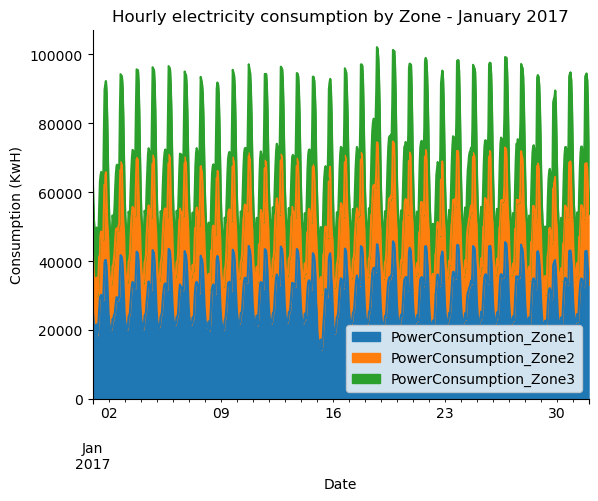

In [49]:
# Plot the area chart
january_2017_consumption.plot.area(
    title='Hourly electricity consumption by Zone - January 2017', #Stacked line chart visualizing power consumption for January 2017
    xlabel='Date',
    ylabel='Consumption (KwH)'
)

# Remove top and right spines
sns.despine()


- Highest overall consumption was on January 18th at 9pm.(100k KWH).
- The other thing is the repeating daily pattern where power spikes in the evening, drops in the early morning before spiking again.
- Power Consumption zone 1 is the largest in terms of consumption on average followed by zone 3 and zone 2 looks smallest.

In [19]:
consumption.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627,0,6


Above, we have visualized seasonality in one way, but creating a heatmap can help us understand further granular details that a line chart might
not make. 

## Visualize consumption Seasonality

In [37]:
# Define the order of days
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [38]:
# Extract the day name from the datetime column and set it as categorical with a specific order
consumption['day_name'] = pd.Categorical(
    consumption['Datetime'].dt.day_name(),
    categories=day_of_week, 
    ordered=True
)

We will now create a pivot table where the rows are the day of week, the columns are hour of the day, and the cells represent the average
value of total_consumption.

In [39]:
# Create a pivot table for visualization
power_heatmap = consumption.pivot_table(
    index='day_name',
    columns='hour',
    values='total_consumption',
    aggfunc='mean'
)

In [50]:
power_heatmap.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Monday,67817.926234,61755.422717,58647.360270,56399.125350,54823.472531,51680.112788,50810.531813,52647.477122,58153.995604,64829.891067,...,76295.125575,74951.160542,73672.590199,77737.724117,87015.319529,96344.104726,98636.766753,94795.229937,87444.628027,77141.248435
Tuesday,67935.356547,61868.544847,58801.200586,56642.907327,55088.146346,52165.725002,51320.086009,53314.431143,58788.751316,65473.069281,...,76564.586378,75151.608847,73866.089284,78034.431306,87425.955170,96812.639776,98951.522986,95247.295786,88105.205865,77583.710692
Wednesday,68239.842528,62022.724317,58798.761412,56626.703787,55114.497390,52157.866552,51411.322040,53186.989913,58830.511611,65583.730610,...,77084.718564,75799.737721,74690.144168,78963.032971,88010.877872,97121.892997,99259.106506,95347.105487,87966.060059,77526.249785
Thursday,68293.632675,62187.544469,59063.328906,56958.133058,55465.004964,52336.590999,51408.387710,53305.035278,58985.960718,65850.016097,...,77129.099508,76024.015184,74771.523732,78859.415340,88130.713827,97361.509809,99639.276059,95745.056611,88461.996304,78369.942328
Friday,68959.251459,62533.960861,59152.040758,56825.429786,55296.351259,52178.788896,51156.640309,52771.135698,58250.443622,65179.083324,...,74344.497887,73169.524043,72295.790052,76172.341277,85512.967870,94802.624915,97380.905756,94232.932202,87846.655100,78259.646904


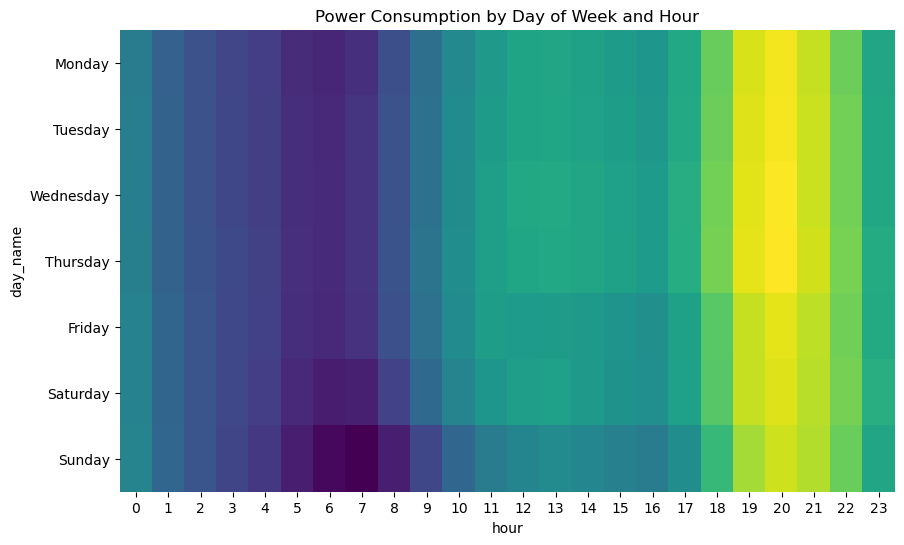

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(power_heatmap, cmap='viridis', cbar=False).       #Creating heatmap using the above pivot table

# Set title
plt.title('Power Consumption by Day of Week and Hour')

# Show the plot
plt.show()


- We see that similar to line chart, in the heat map also the consumption spikes from 7pm - 9pm before trialing off in the early morning hours 
and raising again.
- Assuming that Sunday is a public holiday, presumably people are taking timeoff and are not using much energy during the usual office or factory hours. 
- If we compare the whole week, Sunday has lower consumption overall.
- Hence, we can infer that consumption peaks in the late day, lower in the early morning while slightly different patterns for Satruday and Sunday.